In [288]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_csv('health_data.csv')
print(df.describe())
print(df.info())

       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.948723               2.000000               5.967243   
50%            29.958081               3.000000               6.972331   
75%            35.008525               4.000000               7.886509   
max            57.201692               9.000000              10.708419   

       Stress_Level         BMI  
count    200.000000  200.000000  
mean       4.995000   25.150008  
std        2.605556    5.070778  
min        1.000000   12.502971  
25%        3.000000   21.458196  
50%        5.000000   25.155662  
75%        7.000000   28.011155  
max        9.000000   37.898547  
<class 'pandas.core.frame.D

<Axes: >

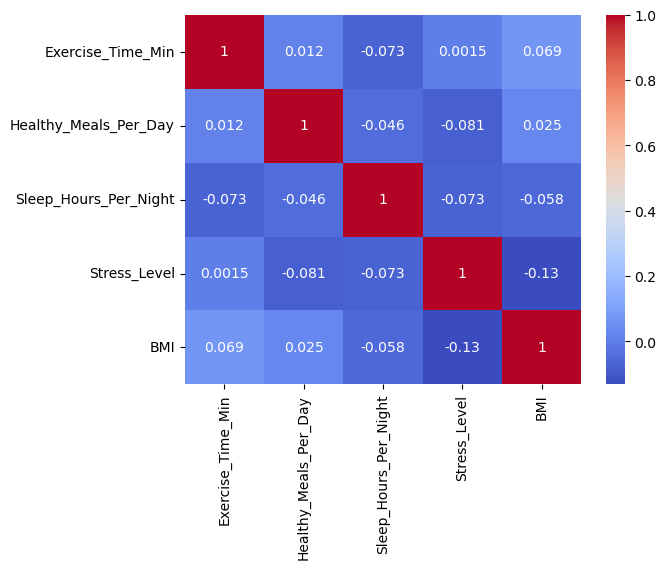

In [290]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
X = df[['Healthy_Meals_Per_Day', 'Exercise_Time_Min', 'Sleep_Hours_Per_Night', 'Stress_Level']]
y = df[['BMI']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

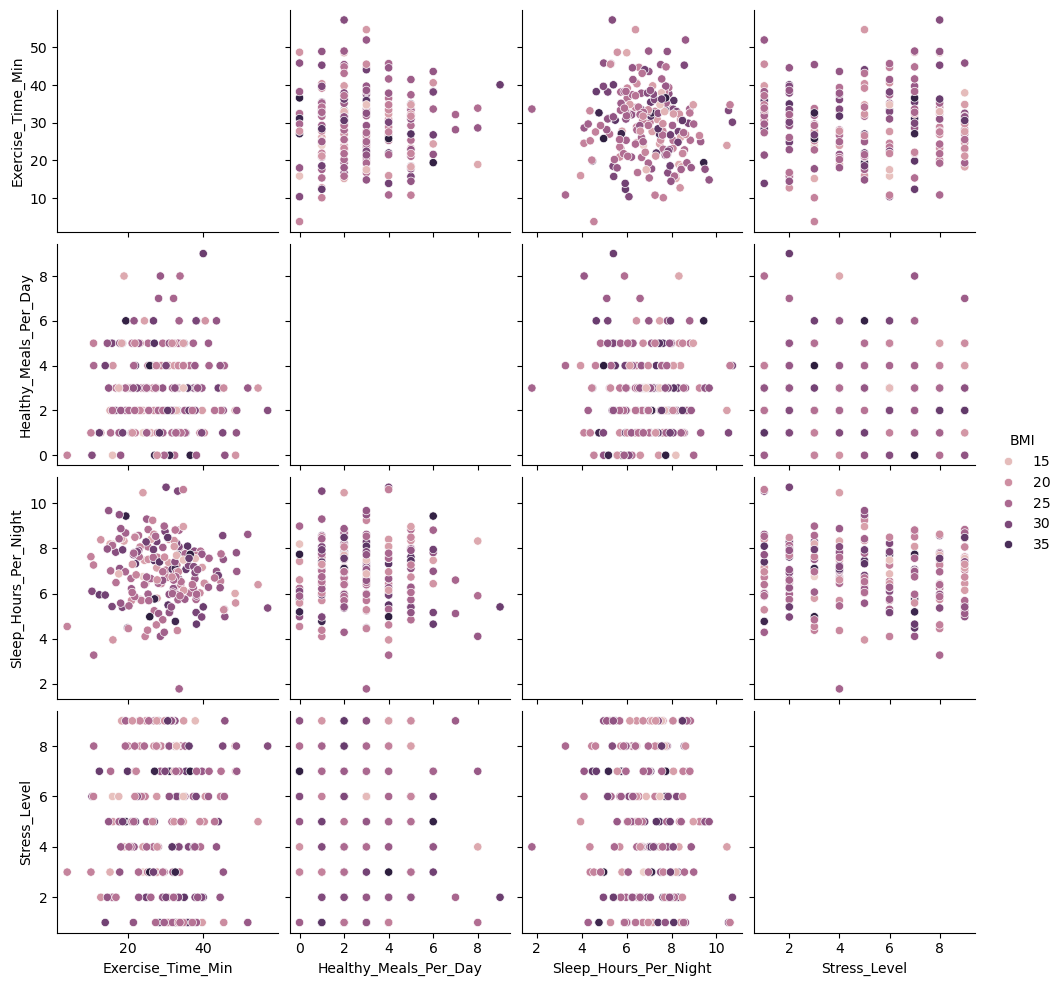

In [292]:
sns.pairplot(df, hue='BMI')

In [293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
features = df.drop(columns=['BMI'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

kmeans_orig = KMeans(n_clusters=4, random_state=42)
labels_orig = kmeans_orig.fit_predict(scaled_data)

print("Original K Means Silhouette Score:", silhouette_score(scaled_data, labels_orig))

Original K Means Silhouette Score: 0.18851850058630204


C:\Users\rhseb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Original Hierarchical Silhouette Score: 0.348


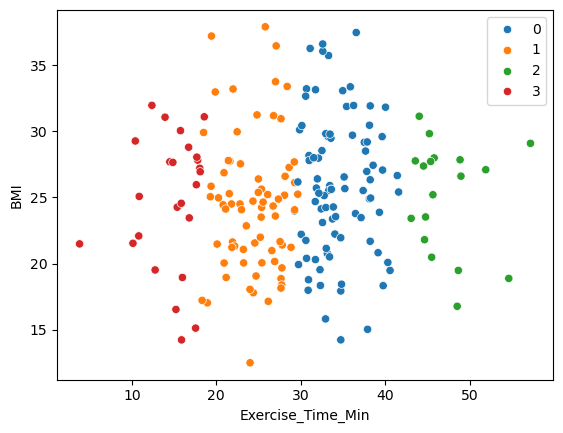

In [306]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = model.fit_predict(X)

df['cluster'] = labels

sns.scatterplot(x=X.iloc[:, 1], y=y.iloc[:, 0], hue=labels, palette='tab10')
score = silhouette_score(X, labels)
print(f'Original Hierarchical Silhouette Score: {score:.3f}')

<Axes: xlabel='PC1', ylabel='PC2'>

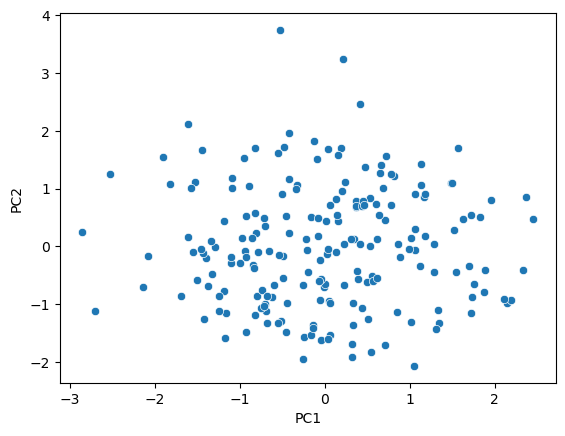

In [295]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

sns.scatterplot(data=pca_df, x='PC1', y='PC2')

In [296]:
kmeans_pca = KMeans(n_clusters=6, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

print("PCA K means Silhouette Score:", silhouette_score(X_pca, labels_pca))

PCA K means Silhouette Score: 0.3336340454733544


C:\Users\rhseb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

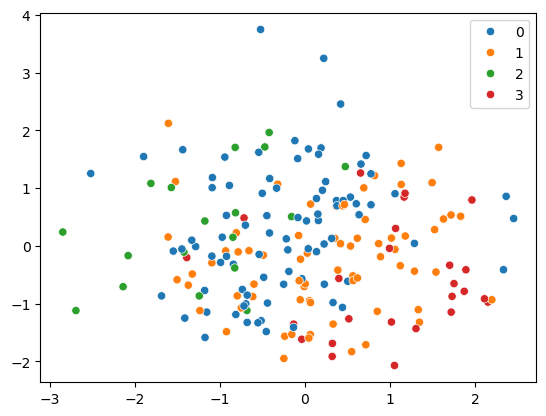

In [348]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = model.fit_predict(X)

df['cluster'] = labels

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10')

In [364]:
score = silhouette_score(X_pca, labels_pca)
print(f"Hierarchical PCA Silhouette Score: {score:.3f}")

Hierarchical PCA Silhouette Score: 0.334
